In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
import scipy.stats as st
import ast

In [135]:
# Downloading the dataset

import pandas as pd

# Load Pickle version
df = pd.read_pickle(r'c:\Users\lisad\OneDrive\US_Data_Job_Listing_2022_to_2025\df_clean.pkl')

In [137]:
# Create a copy of the original DataFrame for analysis purposes

df_copy = df.copy()

In [138]:
# Display summary info of the df_copy

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61953 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           61953 non-null  int64         
 1   index                61953 non-null  int64         
 2   title                61953 non-null  object        
 3   company_name         61953 non-null  object        
 4   location             61916 non-null  object        
 5   via                  61944 non-null  object        
 6   description          61953 non-null  object        
 7   extensions           61953 non-null  object        
 8   job_id               61953 non-null  object        
 9   thumbnail            38194 non-null  object        
 10  posted_at            61763 non-null  object        
 11  schedule_type        61707 non-null  object        
 12  work_from_home       27980 non-null  object        
 13  salary               10088 non-

In [139]:
# Filter Data Frame to include only data for the year 2023

df_2023 = df_copy[df_copy['year'] == 2023].copy()

In [140]:
# Display summary info of the df_2023

df_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33413 entries, 0 to 61952
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           33413 non-null  int64         
 1   index                33413 non-null  int64         
 2   title                33413 non-null  object        
 3   company_name         33413 non-null  object        
 4   location             33391 non-null  object        
 5   via                  33404 non-null  object        
 6   description          33413 non-null  object        
 7   extensions           33413 non-null  object        
 8   job_id               33413 non-null  object        
 9   thumbnail            19571 non-null  object        
 10  posted_at            33413 non-null  object        
 11  schedule_type        33258 non-null  object        
 12  work_from_home       14624 non-null  object        
 13  salary               5658 non-null  

In [141]:
# Verifying the descriptive statistics for df_2023

df_2023.describe()

,Unnamed: 0,index,date_time,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,year,month
count,33413.000000,33413.000000,33413,0.0,5658.000000,5356.000000,5356.000000,3767.000000,1880.000000,5658.000000,33413.0,33413.000000
mean,37941.402119,1134.835393,2023-06-27 21:23:02.104077056,NaN,33647.195528,28348.584882,39641.621314,41.170166,101144.306755,90768.423270,2023.0,6.392721
min,0.000000,0.000000,2023-01-01 04:00:11.178072,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000,2023.0,1.000000
25%,24611.000000,517.000000,2023-03-22 03:00:46.837785088,NaN,30.000000,18.330000,40.000000,23.500000,81641.000000,61353.000000,2023.0,3.000000
50%,39496.000000,1102.000000,2023-07-04 03:00:11.406449920,NaN,57.500000,40.000000,75.000000,33.500000,96500.000000,88400.000000,2023.0,7.000000
75%,50340.000000,1691.000000,2023-09-30 03:00:46.436222976,NaN,81500.000000,70000.000000,95000.000000,57.500000,111608.625000,116480.000000,2023.0,9.000000
max,61952.000000,3228.000000,2023-12-31 04:00:20.281623,NaN,300000.000000,275000.000000,346000.000000,300.000000,300000.000000,624000.000000,2023.0,12.000000
std,15482.986883,714.296810,NaN,NaN,51011.117530,43125.572188,60130.229762,22.760203,31737.938135,43365.259619,0.0,3.522935


In [142]:
# Record keeping for filtered data from df_copy Data Frame

print(f'Filtered {len(df_2023):,} job postings for year 2023')

Filtered 33,413 job postings for year 2023


In [144]:
# Check Data Frame df_2023's filtered data validation

assert df_2023['year'].nunique() == 1 and df_2023['year'].iloc[0] == 2023

In [145]:
# Log shape changes between df_copy and df_2023 Data Frames

print(f'Original: {df_copy.shape[0]:,} rows -> 2023 subset: {df_2023.shape[0]:,} rows')

Original: 61,953 rows -> 2023 subset: 33,413 rows


In [146]:
# Select and reorder relevant columns for analysis, and reset index for clarity

df_2023 = df_2023[[
'date_time','date', 'year', 'month',
'company_name', 'location','website',
'employment_type','remote_work', 
'seniority_level','clean_title',
'salary_standardized','salary_hourly', 
'salary_yearly', 'job_skills'
]].reset_index(drop=True)

df_2023.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
1,2023-08-04 03:00:13.797776,2023-08-04,2023,8,ATC,United States,linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[]
2,2023-08-04 03:00:13.797776,2023-08-04,2023,8,"Garmin International, Inc.","Olathe, KS",indeed,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[sql]
3,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Upwork,Anywhere,Upwork,Contract,True,,Data Analyst,41600.0,20.0,NaN,"[powerpoint, excel, power_bi]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"


# Capturing the Most In-Demand Skills For Data Postitions in 2023

In [147]:
# Count job titles in df_2023
# Generate a count of each unique cleaned job title

df_2023['clean_title'].value_counts().reset_index(name='title_total')
df_2023_title_count = df_2023['clean_title'].value_counts().reset_index(name='title_total')

In [148]:
# Preview top job titles by frequency

df_2023_title_count.head(10)

,clean_title,title_total
0,Data Analyst,23688
1,Business Analyst,2692
2,Data Scientist,1545
3,Data Engineer,1050
4,Healthcare Analyst,586
5,Financial Analyst,526
6,Marketing Analyst,465
7,Operations Research Analyst,451
8,Statistical Analyst,311
9,Product Analyst,293


In [149]:
# Expand the 'job_skills' list into individual rows
# Allows counting each skill independently across job postings

df_2023_skills = df_2023.explode('job_skills')
df_2023_skills[['clean_title', 'job_skills']]

,clean_title,job_skills
0,Data Analyst,tableau
0,Data Analyst,r
0,Data Analyst,python
0,Data Analyst,sql
0,Data Analyst,test_skill
...,...,...
33410,Data Analyst,r
33410,Data Analyst,python
33411,Data Analyst,sql
33412,Data Analyst,tableau


In [150]:
# Count how often each skill appears for each job title

df_2023_skills_count = (
    df_2023_skills
    .groupby(['job_skills', 'clean_title'])
    .size()
    .reset_index(name='skill_count')
)

df_2023_skills_count

,job_skills,clean_title,skill_count
0,airflow,Business Analyst,21
1,airflow,Data Analyst,160
2,airflow,Data Engineer,109
3,airflow,Data Modeler,1
4,airflow,Data Scientist,18
...,...,...,...
1622,word,Software Analyst,2
1623,word,Software Engineer,1
1624,word,Statistical Analyst,8
1625,word,Supply Chain Analyst,17


In [151]:
# Merge with total job title counts to calculate percentages

df_2023_skill_percent = pd.merge(
    df_2023_skills_count, 
    df_2023_title_count, 
    how='left', 
    on='clean_title'
)
df_2023_skill_percent

,job_skills,clean_title,skill_count,title_total
0,airflow,Business Analyst,21,2692
1,airflow,Data Analyst,160,23688
2,airflow,Data Engineer,109,1050
3,airflow,Data Modeler,1,104
4,airflow,Data Scientist,18,1545
...,...,...,...,...
1622,word,Software Analyst,2,15
1623,word,Software Engineer,1,22
1624,word,Statistical Analyst,8,311
1625,word,Supply Chain Analyst,17,155


In [152]:
# Calculate percentage of job listings requiring each skill (per title)

df_2023_skill_percent['skill_percentage'] = round(100* df_2023_skill_percent['skill_count'] / 
                                                  df_2023_skill_percent['title_total'], 2)

df_2023_skill_percent

,job_skills,clean_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,21,2692,0.78
1,airflow,Data Analyst,160,23688,0.68
2,airflow,Data Engineer,109,1050,10.38
3,airflow,Data Modeler,1,104,0.96
4,airflow,Data Scientist,18,1545,1.17
...,...,...,...,...,...
1622,word,Software Analyst,2,15,13.33
1623,word,Software Engineer,1,22,4.55
1624,word,Statistical Analyst,8,311,2.57
1625,word,Supply Chain Analyst,17,155,10.97


In [154]:
# Renaming columns for clarity

df_2023_skill_percent.rename(columns={
    'job_skills': 'skill',
    'clean_title': 'job_title'
}, inplace=True)

df_2023_skill_percent

,skill,job_title,skill_count,title_total,skill_percentage
0,airflow,Business Analyst,21,2692,0.78
1,airflow,Data Analyst,160,23688,0.68
2,airflow,Data Engineer,109,1050,10.38
3,airflow,Data Modeler,1,104,0.96
4,airflow,Data Scientist,18,1545,1.17
...,...,...,...,...,...
1622,word,Software Analyst,2,15,13.33
1623,word,Software Engineer,1,22,4.55
1624,word,Statistical Analyst,8,311,2.57
1625,word,Supply Chain Analyst,17,155,10.97


In [155]:
# Sorting skills 

df_2023_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_2023_skills_count

,job_skills,clean_title,skill_count
1353,sql,Data Analyst,11949
291,excel,Data Analyst,8335
890,power_bi,Data Analyst,6877
1450,tableau,Data Analyst,6628
976,python,Data Analyst,6593
...,...,...,...
625,looker,NaN,1
7,airflow,Marketing Analyst,1
1623,word,Software Engineer,1
5,airflow,Data Warehouse Analyst,1


In [156]:
# Capturing Top 5 job titles in 2023

job_titles_2023 = df_2023_skills_count['clean_title'].dropna().unique().tolist()
job_titles_2023 = sorted(job_titles_2023[:5])
job_titles_2023

['Business Analyst',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Healthcare Analyst']

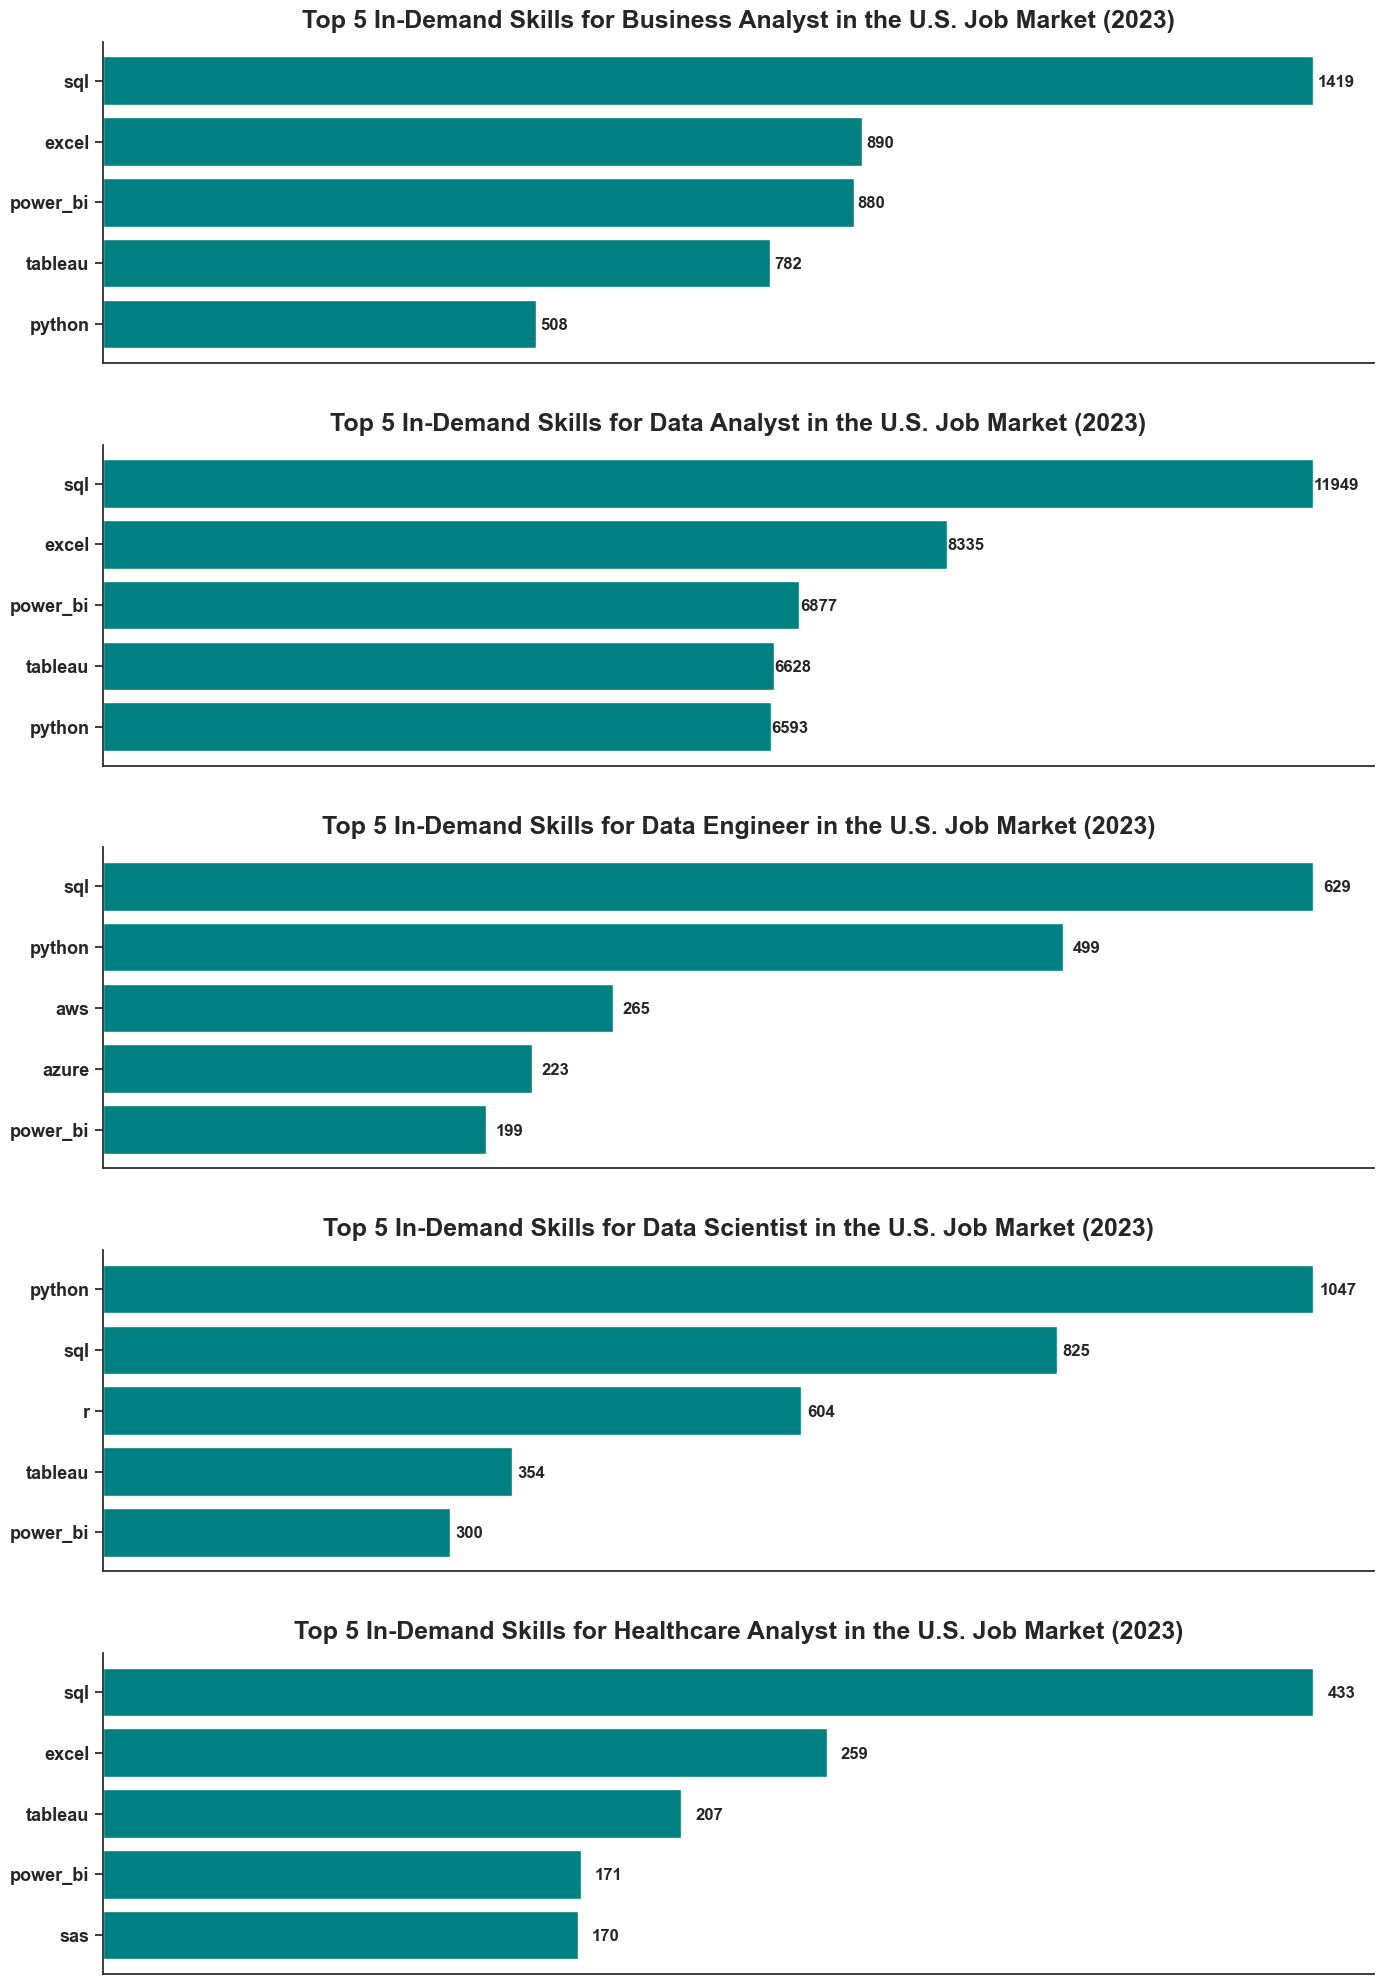

In [ ]:
# Most Sought-After Skills for Leading Data Roles in 2023

# Create subplots
fig, ax = plt.subplots(len(job_titles_2023), 1, figsize=(14, 20), sharex=False)

# Ensure ax is always iterable
if len(job_titles_2023) == 1:
    ax = [ax]

for i, job_title in enumerate(job_titles_2023):
    # Filter and sort top 5 skills
    df_2023_plot = df_2023_skills_count[
        df_2023_skills_count['clean_title'] == job_title
    ].nlargest(5, 'skill_count')

    # Plot with ax[i]
    bars = ax[i].barh(
        df_2023_plot['job_skills'],
        df_2023_plot['skill_count'],
        color='teal'
    )

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax[i].text(
            width + 5, y, f'{int(width)}',
            va='center_baseline', 
            fontsize=12, 
            fontweight='bold'
        )
        
    # Despine the right side
    for axes in ax:
        sns.despine(ax=axes, right=True)

    # Customize each subplot (moved inside the loop)
    ax[i].invert_yaxis()
    ax[i].axes.get_xaxis().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} in the U.S. Job Market (2023)',
                    fontsize=18, fontweight='bold', pad=10
    )
    
 # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('semibold')


plt.tight_layout(h_pad=4)
plt.show()

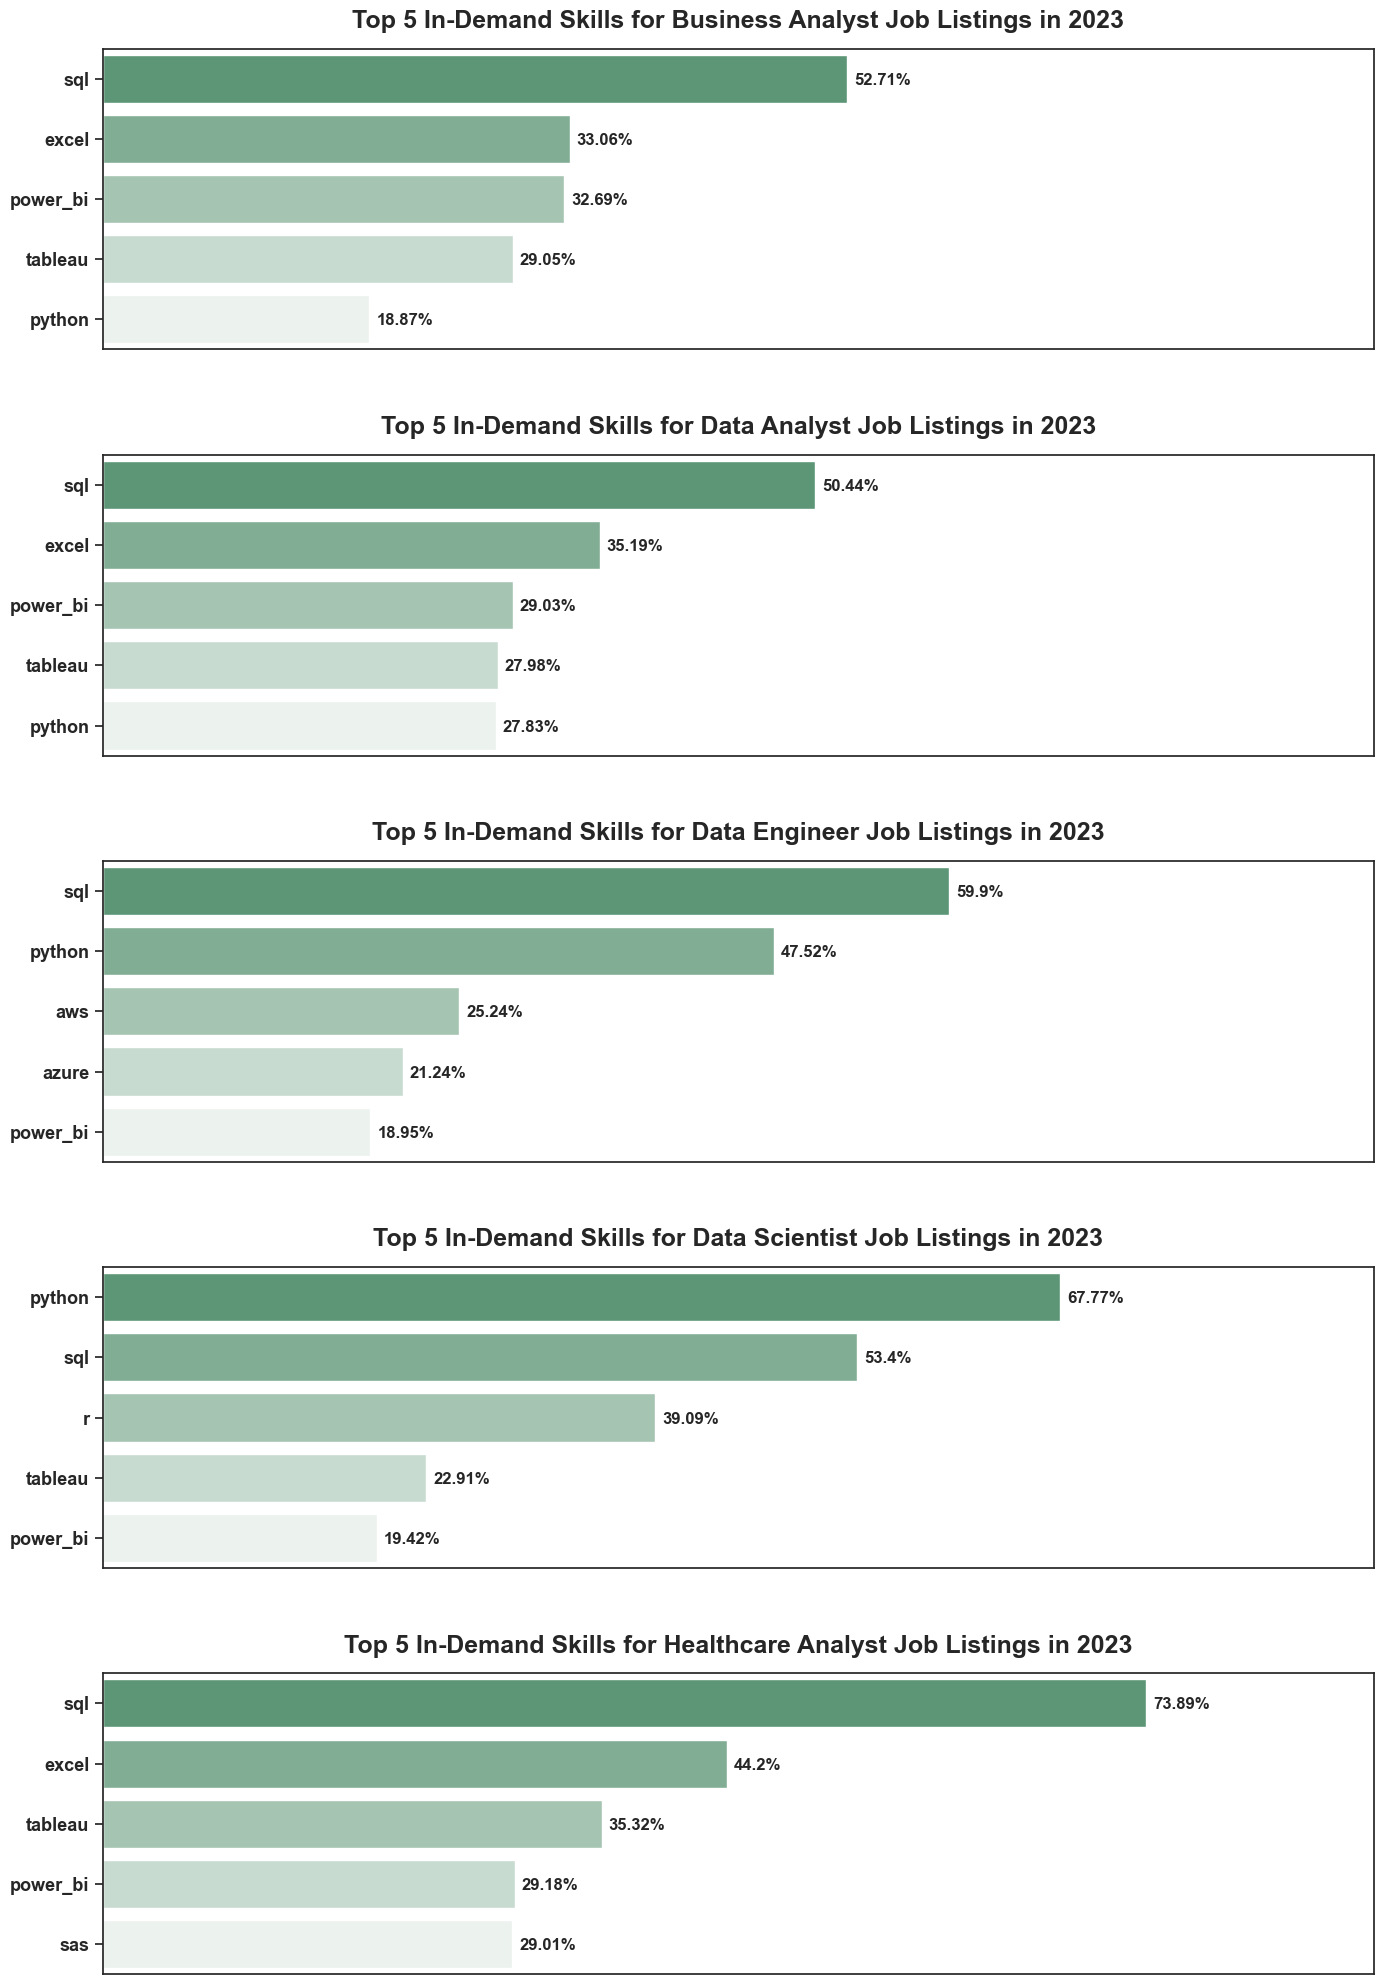

In [200]:
# Key Skills Driving Demand in Data Roles (2023)


# Set the overall theme
sns.set_theme(style='ticks')

# Create subplots
fig, ax = plt.subplots(len(job_titles_2023), 1, figsize=(14, 20), sharex=False)


# Ensuring ax is always iterable
if len(job_titles_2023) == 1:
    ax = [ax]


for i, job_title in enumerate(job_titles_2023):
    # Filter and sort skill counts for the current job title
    df_2023_bar_plot = df_2023_skill_percent[
        df_2023_skill_percent['job_title'] == job_title
    ].nlargest(5, 'skill_count')


    # Add percentage labels to each bar
    for index, value in enumerate (df_2023_bar_plot['skill_percentage']):
        ax[i].text(value + .5, index, f'{value}%', 
                   va='center_baseline', fontsize=12, fontweight='bold')

        

    # Plot horizontal bar chart
    num_lines = df_2023_bar_plot.shape[1]  # number of columns (lines)
    palette = sns.light_palette('seagreen')[:num_lines]

    sns.barplot(
        data=df_2023_bar_plot,
        x='skill_percentage',
        y='skill',
        ax= ax[i],
        hue='skill_count',
        palette=palette

    )
    
    # Title and axis formatting
    ax[i].invert_xaxis()
    ax[i].set_xticks([])
    ax[i].set_title(f'Top 5 In-Demand Skills for {job_title} Job Listings in 2023', 
                    fontsize=18, fontweight='bold', pad=15)
    ax[i].set_xlim(0, 90)
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_ylabel('')

     # Make skill names bold and larger
    ax[i].tick_params(axis='y', labelsize=13)
    for label in ax[i].get_yticklabels():
        label.set_fontweight('semibold')


# Final layout tweaks   
plt.tight_layout(h_pad=4)  # Adding vertical padding between plots
plt.show()

In [162]:
# Explode 'job_skills' list into individual rows
# This allows each skill in a posting to be analyzed separately

df_2023_explode = df_2023.explode('job_skills')
df_2023_explode.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,tableau
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,r
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,python
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,sql
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,test_skill


In [163]:
# Create pivot table of monthly skill counts
# Rows = month, Columns = individual skills, Values = count of mentions

df_2023_pivot = df_2023_explode.pivot_table(
    index='month',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

df_2023_pivot

job_skills,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,24,126,1,6,8,7,4,193,231,5,...,2,26,5,2,64,34,28,1,0,295
2,16,104,3,2,17,8,2,217,148,5,...,0,22,2,1,67,35,20,2,1,250
3,19,75,2,0,5,6,10,143,107,4,...,0,17,2,3,72,36,14,0,0,216
4,21,57,1,1,4,2,3,125,123,2,...,0,20,2,1,66,41,25,0,0,205
5,14,53,1,2,13,2,1,130,134,8,...,2,9,5,0,61,35,17,1,0,162
6,21,111,1,1,14,7,1,120,133,4,...,4,17,0,1,69,26,6,0,0,157
7,30,101,0,2,6,1,2,118,162,8,...,0,12,3,1,77,27,10,1,0,196
8,60,101,0,4,5,4,10,163,198,1,...,1,22,1,2,84,33,7,2,0,235
9,29,77,0,5,6,1,7,159,203,8,...,1,10,2,3,72,36,11,1,0,239


In [164]:
# Add a row labeled 'Total', to calculate total count

df_2023_pivot.loc['Total']  = df_2023_pivot.sum()
df_2023_pivot

job_skills,airflow,alteryx,apl,asp.net,assembly,atlassian,aurora,aws,azure,bash,...,typescript,unix,unix/linux,vb.net,vba,visio,visual_basic,vue,vue.js,word
month,,,,,,,,,,,,,,,,,,,,,
1,24,126,1,6,8,7,4,193,231,5,...,2,26,5,2,64,34,28,1,0,295
2,16,104,3,2,17,8,2,217,148,5,...,0,22,2,1,67,35,20,2,1,250
3,19,75,2,0,5,6,10,143,107,4,...,0,17,2,3,72,36,14,0,0,216
4,21,57,1,1,4,2,3,125,123,2,...,0,20,2,1,66,41,25,0,0,205
5,14,53,1,2,13,2,1,130,134,8,...,2,9,5,0,61,35,17,1,0,162
6,21,111,1,1,14,7,1,120,133,4,...,4,17,0,1,69,26,6,0,0,157
7,30,101,0,2,6,1,2,118,162,8,...,0,12,3,1,77,27,10,1,0,196
8,60,101,0,4,5,4,10,163,198,1,...,1,22,1,2,84,33,7,2,0,235
9,29,77,0,5,6,1,7,159,203,8,...,1,10,2,3,72,36,11,1,0,239


In [165]:
# Sort column['job_skill'] by total across all months

df_2023_pivot[df_2023_pivot.loc['Total'].sort_values(ascending=False).index]

df_2023_pivot = df_2023_pivot[df_2023_pivot
                              .loc['Total']
                              .sort_values(ascending=False).index]
df_2023_pivot

job_skills,sql,excel,python,power_bi,tableau,r,sas,powerpoint,word,azure,...,mlr,kotlin,erlang,haskell,delphi,javascript/typescript,mlpack,sass,test_skill,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,2013,1279,929,922,1184,581,296,373,295,231,...,0,0,0,0,0,0,0,0,0,0
2,1434,1045,786,764,725,475,241,232,250,148,...,0,0,0,0,0,0,0,0,0,1
3,1461,987,781,785,714,493,260,189,216,107,...,0,0,0,0,0,0,0,0,0,0
4,1206,849,690,649,680,437,235,188,205,123,...,0,0,0,0,0,0,0,0,0,0
5,1154,708,639,686,651,395,192,145,162,134,...,0,0,0,0,1,0,0,0,0,0
6,1163,763,672,643,693,384,150,182,157,133,...,0,0,0,0,0,0,0,0,0,0
7,1207,770,693,719,643,447,182,219,196,162,...,2,2,0,1,0,0,0,0,0,0
8,1657,964,986,959,861,597,286,239,235,198,...,1,0,2,1,0,0,0,1,1,0
9,1457,967,885,893,834,596,281,249,239,203,...,0,0,0,0,0,1,0,0,0,0


In [166]:
#  Drop 'Total' row after sorting

df_2023_pivot = df_2023_pivot.drop('Total')
df_2023_pivot


job_skills,sql,excel,python,power_bi,tableau,r,sas,powerpoint,word,azure,...,mlr,kotlin,erlang,haskell,delphi,javascript/typescript,mlpack,sass,test_skill,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,2013,1279,929,922,1184,581,296,373,295,231,...,0,0,0,0,0,0,0,0,0,0
2,1434,1045,786,764,725,475,241,232,250,148,...,0,0,0,0,0,0,0,0,0,1
3,1461,987,781,785,714,493,260,189,216,107,...,0,0,0,0,0,0,0,0,0,0
4,1206,849,690,649,680,437,235,188,205,123,...,0,0,0,0,0,0,0,0,0,0
5,1154,708,639,686,651,395,192,145,162,134,...,0,0,0,0,1,0,0,0,0,0
6,1163,763,672,643,693,384,150,182,157,133,...,0,0,0,0,0,0,0,0,0,0
7,1207,770,693,719,643,447,182,219,196,162,...,2,2,0,1,0,0,0,0,0,0
8,1657,964,986,959,861,597,286,239,235,198,...,1,0,2,1,0,0,0,1,1,0
9,1457,967,885,893,834,596,281,249,239,203,...,0,0,0,0,0,1,0,0,0,0


In [167]:
# Count total job listings per month

data_2023_total = df_2023.groupby('month').size()
data_2023_total

month
1     3682
2     2828
3     2727
4     2493
5     2357
6     2362
7     2560
8     3008
9     3085
10    3364
11    2601
12    2346
dtype: int64

In [168]:
# Calculate percentage of the job listings mentioning eack skill per month
# Normalize skill frequency by overall job listing volume

df_2023_percent = round(df_2023_pivot.div(other=data_2023_total/100, axis=0), 2)
df_2023_percent

job_skills,sql,excel,python,power_bi,tableau,r,sas,powerpoint,word,azure,...,mlr,kotlin,erlang,haskell,delphi,javascript/typescript,mlpack,sass,test_skill,vue.js
month,,,,,,,,,,,,,,,,,,,,,
1,54.67,34.74,25.23,25.04,32.16,15.78,8.04,10.13,8.01,6.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,50.71,36.95,27.79,27.02,25.64,16.80,8.52,8.20,8.84,5.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
3,53.58,36.19,28.64,28.79,26.18,18.08,9.53,6.93,7.92,3.92,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,48.38,34.06,27.68,26.03,27.28,17.53,9.43,7.54,8.22,4.93,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,48.96,30.04,27.11,29.10,27.62,16.76,8.15,6.15,6.87,5.69,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
6,49.24,32.30,28.45,27.22,29.34,16.26,6.35,7.71,6.65,5.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,47.15,30.08,27.07,28.09,25.12,17.46,7.11,8.55,7.66,6.33,...,0.08,0.08,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
8,55.09,32.05,32.78,31.88,28.62,19.85,9.51,7.95,7.81,6.58,...,0.03,0.00,0.07,0.03,0.00,0.00,0.00,0.03,0.03,0.00
9,47.23,31.35,28.69,28.95,27.03,19.32,9.11,8.07,7.75,6.58,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00


In [169]:
# Resetting the df_2023_percent index

df_2023_percent = df_2023_percent.reset_index()

In [170]:
#Convert numeric month index to month names

df_2023_percent['month_name'] = df_2023_percent['month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [171]:
# Set 'month_name' as index 

df_2023_percent = df_2023_percent.set_index('month_name')

# Drop original numeric month column

df_2023_percent = df_2023_percent.drop(columns='month')

In [172]:
# Verifying the month data has been changed

df_2023_percent

job_skills,sql,excel,python,power_bi,tableau,r,sas,powerpoint,word,azure,...,mlr,kotlin,erlang,haskell,delphi,javascript/typescript,mlpack,sass,test_skill,vue.js
month_name,,,,,,,,,,,,,,,,,,,,,
Jan,54.67,34.74,25.23,25.04,32.16,15.78,8.04,10.13,8.01,6.27,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Feb,50.71,36.95,27.79,27.02,25.64,16.80,8.52,8.20,8.84,5.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
Mar,53.58,36.19,28.64,28.79,26.18,18.08,9.53,6.93,7.92,3.92,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Apr,48.38,34.06,27.68,26.03,27.28,17.53,9.43,7.54,8.22,4.93,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
May,48.96,30.04,27.11,29.10,27.62,16.76,8.15,6.15,6.87,5.69,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00
Jun,49.24,32.30,28.45,27.22,29.34,16.26,6.35,7.71,6.65,5.63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Jul,47.15,30.08,27.07,28.09,25.12,17.46,7.11,8.55,7.66,6.33,...,0.08,0.08,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
Aug,55.09,32.05,32.78,31.88,28.62,19.85,9.51,7.95,7.81,6.58,...,0.03,0.00,0.07,0.03,0.00,0.00,0.00,0.03,0.03,0.00
Sep,47.23,31.35,28.69,28.95,27.03,19.32,9.11,8.07,7.75,6.58,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00


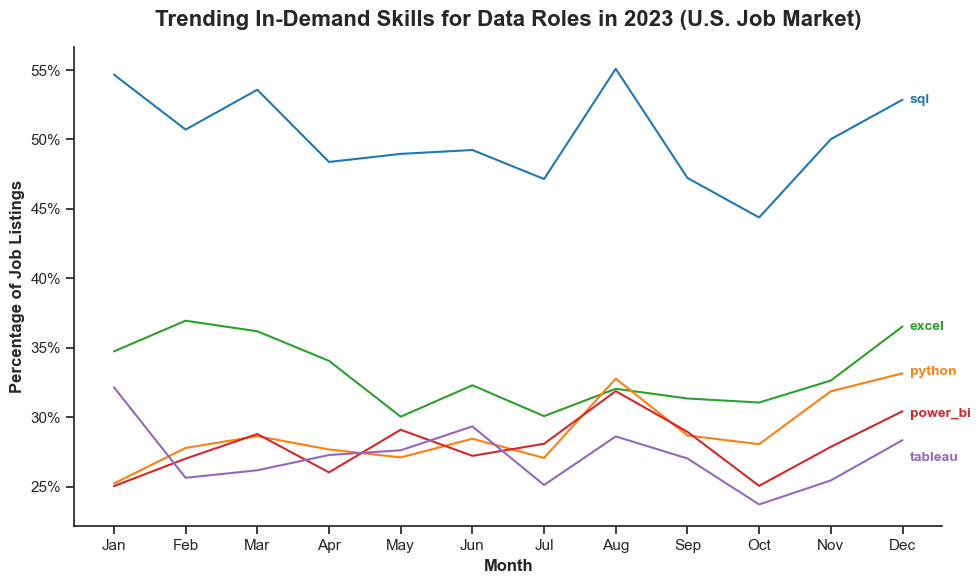

In [173]:
# In-Demand Skills Trends for Data Roles in 2023


# Import libraries
from matplotlib.ticker import PercentFormatter


# Prepare data (top 5 columns for plotting)
df_2023_line_plot = df_2023_percent.iloc[:, :5]

# Define custom color palette (colorblind-friendly)
palette = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']

# Set theme and removing extra chart border
sns.set_theme(style='ticks')


# Create line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df_2023_line_plot, dashes=False, palette=palette)

# Despine AFTER plotting
sns.despine(ax=ax, right=True, top=True)

# Title 
plt.title('Trending In-Demand Skills for Data Roles in 2023 (U.S. Job Market)', 
          fontsize=16, fontweight='bold', pad=15)

# Adjust label offsets to avoid overlap
offsets = [0, 0, 0.1, -0.2, -1.3]  # Adjust Y positions for each skill

# Axis labels
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Job Listings', fontsize=12, fontweight='bold')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()

# Annotating end of each line with the skill name

for i, column in enumerate(df_2023_line_plot.columns):
    y = df_2023_line_plot.iloc[-1, i] + offsets[i]
    plt.text(len(df_2023_line_plot) - 1 + 0.1, y, column,
             va='center', fontsize=10, fontweight='bold', color=palette[i])
    

# Layout adjustment

plt.tight_layout()
plt.show()

# U.S. Data Job Listing Salary for 2023

In [174]:
# Extract top 5 job titles in 2023

df_2023['clean_title'].value_counts().index[:5].to_list()

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Data Engineer',
 'Healthcare Analyst']

In [175]:
# Place top 5 data titles in list named  data_positions_2023

data_positions_2023 = df_2023['clean_title'].value_counts().index[:5].to_list()
data_positions_2023

['Data Analyst',
 'Business Analyst',
 'Data Scientist',
 'Data Engineer',
 'Healthcare Analyst']

In [176]:
# Filter DataFrame for rows where data title is in the top data_positions_2023 list

df_2023_top_positions = df_2023[df_2023['clean_title'].isin(data_positions_2023)]
df_2023_top_positions.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
1,2023-08-04 03:00:13.797776,2023-08-04,2023,8,ATC,United States,linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[]
2,2023-08-04 03:00:13.797776,2023-08-04,2023,8,"Garmin International, Inc.","Olathe, KS",indeed,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[sql]
3,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Upwork,Anywhere,Upwork,Contract,True,,Data Analyst,41600.0,20.0,NaN,"[powerpoint, excel, power_bi]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"


In [177]:
# Group the DataFrame by clean title, calculate median salary_yearly for each,
# Sorts the titles by median salary in descending order, and returns the sorted clean titles.

position_order_2023 = df_2023_top_positions.groupby('clean_title')['salary_yearly'].median().sort_values(ascending=False).index
position_order_2023

Index(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Healthcare Analyst',
       'Business Analyst'],
      dtype='object', name='clean_title')

In [204]:
df_2023_top_positions

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
1,2023-08-04 03:00:13.797776,2023-08-04,2023,8,ATC,United States,linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[]
2,2023-08-04 03:00:13.797776,2023-08-04,2023,8,"Garmin International, Inc.","Olathe, KS",indeed,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[sql]
3,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Upwork,Anywhere,Upwork,Contract,True,,Data Analyst,41600.0,20.0,NaN,"[powerpoint, excel, power_bi]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33408,2023-03-05 04:00:18.752923,2023-03-05,2023,3,Tulsa Remote,"Vera, OK",my arklamiss jobs,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[bigquery, excel, javascript, power_bi, sql]"
33409,2023-02-13 04:00:20.734967,2023-02-13,2023,2,Lumen,United States,my arklamiss jobs,Full-Time,False,Lead,Data Analyst,NaN,NaN,NaN,"[powerpoint, excel, power_bi]"
33410,2023-02-14 04:00:17.092200,2023-02-14,2023,2,UnitedHealth Group,United States,my arklamiss jobs,Full-Time,False,,Data Analyst,NaN,NaN,NaN,"[pyspark, go, sql, word, r, python]"
33411,2023-04-29 03:00:20.950789,2023-04-29,2023,4,Kforce Technology,"Leawood, KS",my arklamiss jobs,Full-Time,False,Senior,Data Analyst,NaN,NaN,NaN,[sql]


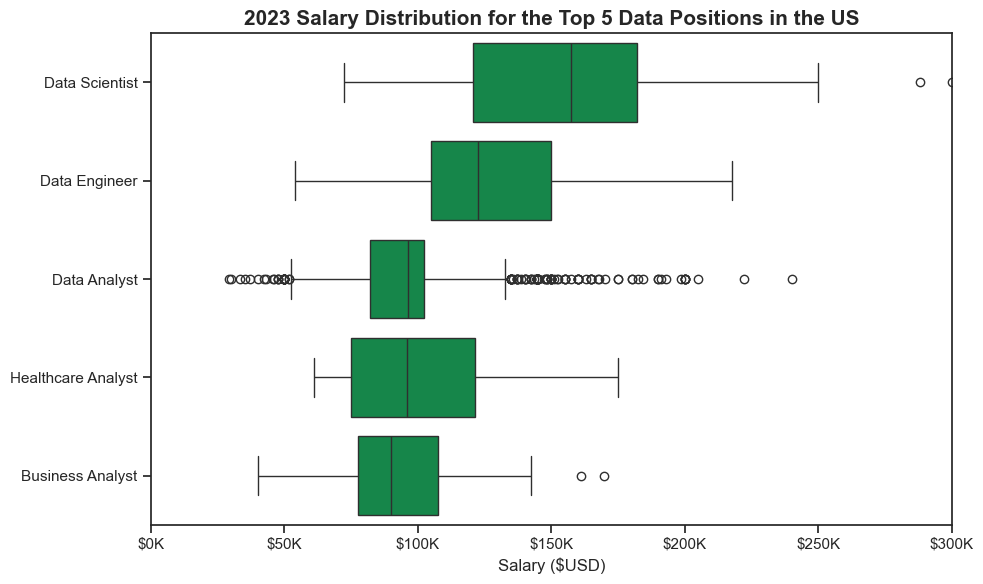

In [178]:
# Analyzing Salary Distribution of Popular Data Roles (2023)


# Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2023_top_positions, 
            x='salary_yearly', 
            y='clean_title',
            order=position_order_2023, color="#039949")

sns.set_theme(style='ticks')

plt.title('2023 Salary Distribution for the Top 5 Data Positions in the US', fontsize = 15, fontweight='bold')
plt.xlabel('Salary ($USD)')
plt.xlim(0, 300000)
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

# Investigating 2023 U.S. Median Salary vs Skill for Analyst Job Listings

In [179]:
# Filtering DataFrame to hold only Analyst job listings

df_2023_analyst = df_2023[
    df_2023['clean_title'].str.contains('analyst', case=False, na=False)
].copy()

df_2023_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
1,2023-08-04 03:00:13.797776,2023-08-04,2023,8,ATC,United States,linkedin,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[]
2,2023-08-04 03:00:13.797776,2023-08-04,2023,8,"Garmin International, Inc.","Olathe, KS",indeed,Full-Time,False,,Data Analyst,NaN,NaN,NaN,[sql]
3,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Upwork,Anywhere,Upwork,Contract,True,,Data Analyst,41600.0,20.0,NaN,"[powerpoint, excel, power_bi]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"


In [180]:
# Drop all 2023 NaN salary_yearly values

df_2023_analyst = df_2023_analyst.dropna(subset=['salary_yearly'])
df_2023_analyst.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,"[tableau, r, python, sql, test_skill]"
4,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Krispy Kreme,United States,linkedin,Contract,False,,Data Analyst,100000.0,NaN,100000.0,"[powerpoint, excel, outlook, word]"
14,2023-08-04 03:00:19.724974,2023-08-04,2023,8,CIBA Insurance Services,United States,ksnt jobs,Full-Time,False,Mid-Level,Data Analyst,110000.0,NaN,110000.0,"[excel, mssql, ssrs, sql]"
49,2023-08-04 03:00:23.798308,2023-08-04,2023,8,Sompo International,United States,linkedin,Full-Time,False,,Product Analyst,122500.0,NaN,122500.0,"[c, sap, sql]"
72,2023-08-04 03:00:28.680427,2023-08-04,2023,8,COOP Ale Works,"Oklahoma City, OK",linkedin,Full-Time,False,,Business Analyst,55000.0,NaN,55000.0,"[excel, tableau, python, sql]"


In [181]:
# Expand the 'job_skills' list into separate rows for each skill

df_2023_analyst = df_2023_analyst.explode('job_skills')


# Preview salary and skill data after exploding for further analysis

df_2023_analyst[['salary_yearly', 'job_skills']].head(5)

,salary_yearly,job_skills
0,122000.0,tableau
0,122000.0,r
0,122000.0,python
0,122000.0,sql
0,122000.0,test_skill


In [182]:
# Extract Top Salary for analytics position across all job skills

df_2023_analyst.groupby('job_skills')['salary_yearly'].agg(['count', 'median']).sort_values(by='median', ascending=False)

,count,median
job_skills,,
ruby,1,200000.0
typescript,2,180000.0
keras,1,172500.0
php,1,157500.0
datarobot,1,152000.0
...,...,...
gdpr,4,70000.0
selenium,3,70000.0
mongo,2,66450.0


In [183]:
# Extract top salary for analytics position across all job skills.
# Place extracted data into new Data Frame

df_2023_top_analyst_salary = (df_2023_analyst
                      .groupby('job_skills')['salary_yearly']
                      .agg(['count', 'median'])
                      .sort_values(by='median', ascending=False)
                    )
df_2023_top_analyst_salary.head(5)

,count,median
job_skills,,
ruby,1,200000.0
typescript,2,180000.0
keras,1,172500.0
php,1,157500.0
datarobot,1,152000.0


In [184]:
# Extract top 10 salaries for analytics positions in 2023

df_2023_top_analyst_salary = df_2023_top_analyst_salary.head(10)
df_2023_top_analyst_salary

,count,median
job_skills,,
ruby,1,200000.0
typescript,2,180000.0
keras,1,172500.0
php,1,157500.0
datarobot,1,152000.0
bitbucket,2,146500.0
no-sql,2,140000.0
pytorch,2,131250.0
visual_basic,2,128325.0


In [185]:
# Explode skills for the analyst-filtered DataFrame

df_2023_analyst_exploded = df_2023_analyst.explode('job_skills')
df_2023_analyst_exploded.head(5)

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,tableau
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,r
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,python
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,sql
0,2023-08-04 03:00:13.797776,2023-08-04,2023,8,Meta,Anywhere,linkedin,Full-Time,True,,Data Analyst,122000.0,NaN,122000.0,test_skill


In [186]:
# Place extracted data into a new DataFrame from the correct exploded DataFrame

df_2023_analyst_skill = (
    df_2023_analyst_exploded
    .groupby('job_skills')['salary_yearly']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
)
df_2023_analyst_skill

,count,median
job_skills,,
sql,1152,96500.000
tableau,819,96500.000
excel,640,90000.000
power_bi,418,90000.000
python,395,100000.000
...,...,...
keras,1,172500.000
rust,1,80679.665
ruby,1,200000.000


In [187]:
# Select top 10 analyst skills 

df_2023_analyst_skill = (df_2023_analyst_skill.head(10)
                         .sort_values(by='median', ascending=False)
                        )
df_2023_analyst_skill

,count,median
job_skills,,
python,395,100000.0
sql,1152,96500.0
tableau,819,96500.0
microstrategy,389,96500.0
powerpoint,203,96500.0
jira,290,96500.0
r,237,95000.0
power_bi,418,90000.0
excel,640,90000.0


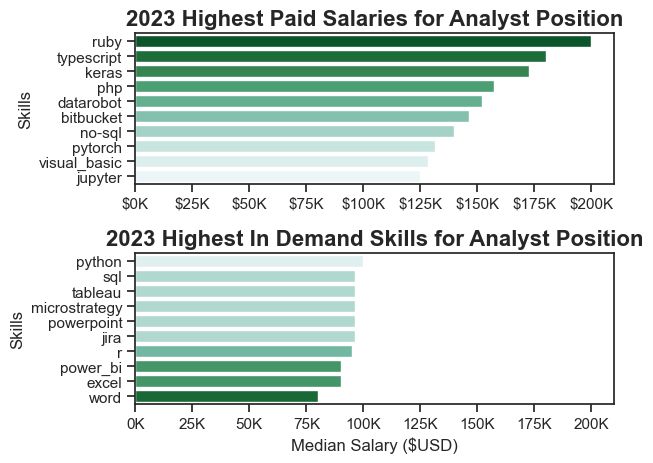

In [203]:
# The Most Lucrative Skills for Analyst Roles (2023)


# Setting figure for visuals
fig, ax = plt.subplots(2, 1)


# Setting visual theme style and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('BuGn', n_colors=10)

# Top 10 Highest Paid Salaries for Analyst Positions
sns.barplot(data=df_2023_top_analyst_salary, x='median', 
            y=df_2023_top_analyst_salary.index, ax = ax[0], 
            hue='median', palette=palette, legend=False
            )


ax[0].set_title('2023 Highest Paid Salaries for Analyst Position', fontsize=16, fontweight='bold')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
ax[0].set_ylabel('Skills')


# Top 10 Most In Demand Skills for Analyst Positions
palette = sns.color_palette('BuGn_r', n_colors=5)
sns.barplot(data=df_2023_analyst_skill, x='median', 
            y=df_2023_analyst_skill.index, ax = ax[1],
            hue='median', palette=palette, legend=False
            )


ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('2023 Highest In Demand Skills for Analyst Position', fontsize=16, fontweight='bold')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{int(x/1000)}K'))
ax[1].set_ylabel('Skills')

fig.tight_layout()
plt.show()

In [189]:
# Verifying job_skill empty lists

df_2023_analyst[df_2023_analyst['job_skills'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

,date_time,date,year,month,company_name,location,website,employment_type,remote_work,seniority_level,clean_title,salary_standardized,salary_hourly,salary_yearly,job_skills


In [190]:
# Place extracted data into new Data Frame

df_2023_analyst_skill_explode = df_2023_analyst.explode('job_skills')

# Verifying top 10 salaries and their corresponding job skills

df_2023_analyst_skill_explode[['salary_yearly', 'job_skills']].head(10)

,salary_yearly,job_skills
0,122000.0,tableau
0,122000.0,r
0,122000.0,python
0,122000.0,sql
0,122000.0,test_skill
4,100000.0,powerpoint
4,100000.0,excel
4,100000.0,outlook
4,100000.0,word
14,110000.0,excel


In [193]:
# Place extracted data into a new DataFrame

df_2023_analyst_skills = (df_2023_analyst_skill_explode
                          .groupby('job_skills')['salary_yearly']
                          .agg(['count', 'median'])
                          .sort_values(by='count',ascending=False )
                         )

df_2023_analyst_skills

,count,median
job_skills,,
sql,1152,96500.000
tableau,819,96500.000
excel,640,90000.000
power_bi,418,90000.000
python,395,100000.000
...,...,...
keras,1,172500.000
rust,1,80679.665
ruby,1,200000.000


In [194]:
# Renaming the columns in new Data Frame for clarity

df_2023_analyst_skills = (df_2023_analyst_skills
                          .rename(columns=
                                  {'count' : 'skill_count', 
                                   'median': 'median_salary'})
                        )

df_2023_analyst_skills

,skill_count,median_salary
job_skills,,
sql,1152,96500.000
tableau,819,96500.000
excel,640,90000.000
power_bi,418,90000.000
python,395,100000.000
...,...,...
keras,1,172500.000
rust,1,80679.665
ruby,1,200000.000


In [195]:
# Calculating the number of job listings for 2023, by taking the length of the DataFrame df_2023
# Place results in a variable named df_2023_analyst_job_count

df_2023_analyst_job_count = len(df_2023_analyst)
df_2023_analyst_job_count

6629

In [196]:
# Creating a new column for df_2023_analyst_skills named ['skill_percent']
# ['skill_percent'] will hold the percentage calculation below

df_2023_analyst_skills['skill_percent'] = (df_2023_analyst_skills['skill_count'] 
                                           / df_2023_analyst_job_count * 100
                                        )
df_2023_analyst_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,1152,96500.000,17.378187
tableau,819,96500.000,12.354805
excel,640,90000.000,9.654548
power_bi,418,90000.000,6.305627
python,395,100000.000,5.958666
...,...,...,...
keras,1,172500.000,0.015085
rust,1,80679.665,0.015085
ruby,1,200000.000,0.015085


In [198]:
# Define a minimum percentage threshold to filter out less common skills
# This helps to reduce visual clutter in graphs by focusing only on more prevalent skills

min_2023_skill_threshold = 5  # Only include skills that appear in more than 2% of job skills

# Filter the analyst skills DataFrame based on the threshold and create a new DataFrame

df_2023_analyst_skills_filtered = (df_2023_analyst_skills
                                   [df_2023_analyst_skills['skill_percent'] 
                                    > min_2023_skill_threshold]
                                )

df_2023_analyst_skills_filtered

,skill_count,median_salary,skill_percent
job_skills,,,
sql,1152,96500.0,17.378187
tableau,819,96500.0,12.354805
excel,640,90000.0,9.654548
power_bi,418,90000.0,6.305627
python,395,100000.0,5.958666
microstrategy,389,96500.0,5.868155


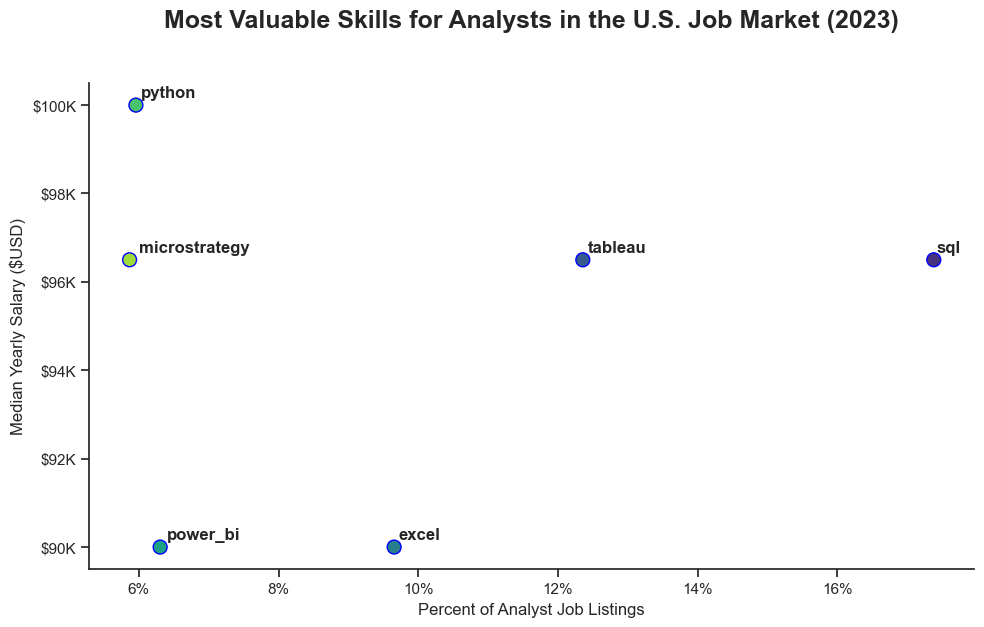

In [199]:
# Top Analyst Skills in the U.S. (2023)


# Import libraries
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text


# Set theme and colour palette
sns.set_theme(style='ticks')
palette = sns.color_palette('viridis', len(df_2023_analyst_skills_filtered))  

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Colour each point uniquely based on skill
scatter = ax.scatter(
    x=df_2023_analyst_skills_filtered['skill_percent'],
    y=df_2023_analyst_skills_filtered['median_salary'],
    c=palette,
    s=100,  # Increase scatter dot size for better visibility
    edgecolor='blue' 
)

# Add text labels
text = []
for i, txt in enumerate(df_2023_analyst_skills_filtered.index):
    text.append(ax.text(
        df_2023_analyst_skills_filtered['skill_percent'].iloc[i],
        df_2023_analyst_skills_filtered['median_salary'].iloc[i],
        txt,
        fontsize=12, 
        va ='bottom', 
        fontweight= 'bold'
    ))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='black', lw=.3), fontweight='bold')

# Format x-axis and y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))

# Remove all spines 
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)

# Set labels and title
ax.set_xlabel('Percent of Analyst Job Listings', fontsize=12)
ax.set_ylabel('Median Yearly Salary ($USD)', fontsize=12)
ax.set_title('Most Valuable Skills for Analysts in the U.S. Job Market (2023)', fontsize=18, fontweight='bold', pad=40)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()